In [4]:
import xgboost as xgb
import h5py
import numpy as np
import HDF5Dataset
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from sklearn.metrics import mean_absolute_error

trainDataset = "/home/erynqian/10701/19F10701_Project/testData/sampled/first365.hdf5"
evalDataset = "/home/erynqian/10701/19F10701_Project/testData/sampled/first50.hdf5"

files = []

# Load training dataset
dset = HDF5Dataset.HDF5Dataset(trainDataset)
print("start splitting")
train_data, train_label, eval_data, eval_label = dset.train_val_test()
print("done splitting")
# train_data, train_label = train_dset()
# print(train_data.shape, train_label.shape)

# Load validation dataset
# eval_dset = HDF5Dataset.HDF5Dataset(evalDataset)
# eval_data, eval_label = eval_dset()
# print(eval_data.shape, eval_label.shape)

start splitting
num of features 57
valX:  (6711, 57) valY: (6711,)
trainX:  (664398, 57) trainY: (664398,)
done splitting


In [2]:
# Initialize training inputs
starthours = [str(i)+'AM' for i in range(1,13)] + [str(i)+'PM' for i in range(1,13)]
starthours = [starthours[-1]] + starthours[:-1]
print(starthours)
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
start_regions = ["start_EWR", "start_Queens", "start_Bronx", "start_Manhattan", "start_Staten_Island","start_Brooklyn"]
end_regions = ["end_EWR", "end_Queens", "end_Bronx", "end_Manhattan", "end_Staten_Island", "end_Brooklyn"]
feature_names = starthours + months + daysofweek + ['isHoliday'] + start_regions + end_regions + ['distance']
print(feature_names)
print(len(feature_names))
dtrain = xgb.DMatrix(train_data, label=train_label, feature_names=feature_names)
dtest = xgb.DMatrix(eval_data, label=eval_label, feature_names=feature_names)
param = {'max_depth': 15, 'eta': 0.6, 
        'subsample': 0.9, 'booster' : 'gbtree',
        'lambda': 1., 'colsample_bytree': 0.9, 'early_stopping_rounds': 5,
        'objective': 'reg:squarederror', 'nthread': 4, 'eval_metric' : 'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]

model_name = '0002'


['12PM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12AM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM']
['12PM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12AM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'isHoliday', 'start_EWR', 'start_Queens', 'start_Bronx', 'start_Manhattan', 'start_Staten_Island', 'start_Brooklyn', 'end_EWR', 'end_Queens', 'end_Bronx', 'end_Manhattan', 'end_Staten_Island', 'end_Brooklyn', 'distance']
57


In [3]:
# Training

num_round = 50
result = {}
bst = xgb.train(param, dtrain, num_round, evallist, evals_result=result)
print(result)
bst.save_model(model_name + '.model')
bst.dump_model('dump.raw.txt')


[0]	eval-rmse:9.24551	train-rmse:9.29809
[1]	eval-rmse:6.90351	train-rmse:6.91061
[2]	eval-rmse:6.37496	train-rmse:6.28692
[3]	eval-rmse:6.273	train-rmse:6.10637
[4]	eval-rmse:6.21938	train-rmse:6.00588
[5]	eval-rmse:6.19521	train-rmse:5.93324
[6]	eval-rmse:6.19337	train-rmse:5.9007
[7]	eval-rmse:6.19682	train-rmse:5.8392
[8]	eval-rmse:6.1948	train-rmse:5.8074
[9]	eval-rmse:6.189	train-rmse:5.77654
[10]	eval-rmse:6.1914	train-rmse:5.73811
[11]	eval-rmse:6.19057	train-rmse:5.71907
[12]	eval-rmse:6.20433	train-rmse:5.69373
[13]	eval-rmse:6.21807	train-rmse:5.675
[14]	eval-rmse:6.23649	train-rmse:5.64769
[15]	eval-rmse:6.23896	train-rmse:5.62236
[16]	eval-rmse:6.23838	train-rmse:5.61134
[17]	eval-rmse:6.2463	train-rmse:5.58794
[18]	eval-rmse:6.25802	train-rmse:5.57145
[19]	eval-rmse:6.26463	train-rmse:5.54936
[20]	eval-rmse:6.27883	train-rmse:5.53355
[21]	eval-rmse:6.28674	train-rmse:5.51566
[22]	eval-rmse:6.28695	train-rmse:5.50273
[23]	eval-rmse:6.29301	train-rmse:5.48637
[24]	eval-rmse

In [29]:
# Continue training the existing model
param = {'max_depth': 15, 'eta': 0.4, 
        'subsample': 0.9, 'booster' : 'gbtree',
        'lambda': 1., 'colsample_bytree': 0.9, 'early_stopping_rounds': 5,
        'objective': 'reg:squarederror', 'nthread': 4, 'eval_metric' : 'rmse'}
model_path = "/home/erynqian/10701/19F10701_Project/" + model_name + ".model"
bst = xgb.train(param, dtrain, 50, evallist, xgb_model=model_path)


[0]	eval-rmse:6.58372	train-rmse:5.30504
[1]	eval-rmse:6.58953	train-rmse:5.30185
[2]	eval-rmse:6.58932	train-rmse:5.29911
[3]	eval-rmse:6.59097	train-rmse:5.29437
[4]	eval-rmse:6.59997	train-rmse:5.2908
[5]	eval-rmse:6.60672	train-rmse:5.28813
[6]	eval-rmse:6.60865	train-rmse:5.28638
[7]	eval-rmse:6.61182	train-rmse:5.28427
[8]	eval-rmse:6.61782	train-rmse:5.28198
[9]	eval-rmse:6.62728	train-rmse:5.27841
[10]	eval-rmse:6.63372	train-rmse:5.27481
[11]	eval-rmse:6.63412	train-rmse:5.27163
[12]	eval-rmse:6.64112	train-rmse:5.26863
[13]	eval-rmse:6.63887	train-rmse:5.26614
[14]	eval-rmse:6.634	train-rmse:5.26387
[15]	eval-rmse:6.64487	train-rmse:5.26125
[16]	eval-rmse:6.64363	train-rmse:5.2589
[17]	eval-rmse:6.64551	train-rmse:5.25734
[18]	eval-rmse:6.64699	train-rmse:5.25716
[19]	eval-rmse:6.64405	train-rmse:5.25452
[20]	eval-rmse:6.64772	train-rmse:5.25253
[21]	eval-rmse:6.64719	train-rmse:5.25239
[22]	eval-rmse:6.65466	train-rmse:5.2503
[23]	eval-rmse:6.65404	train-rmse:5.24891
[24]	ev

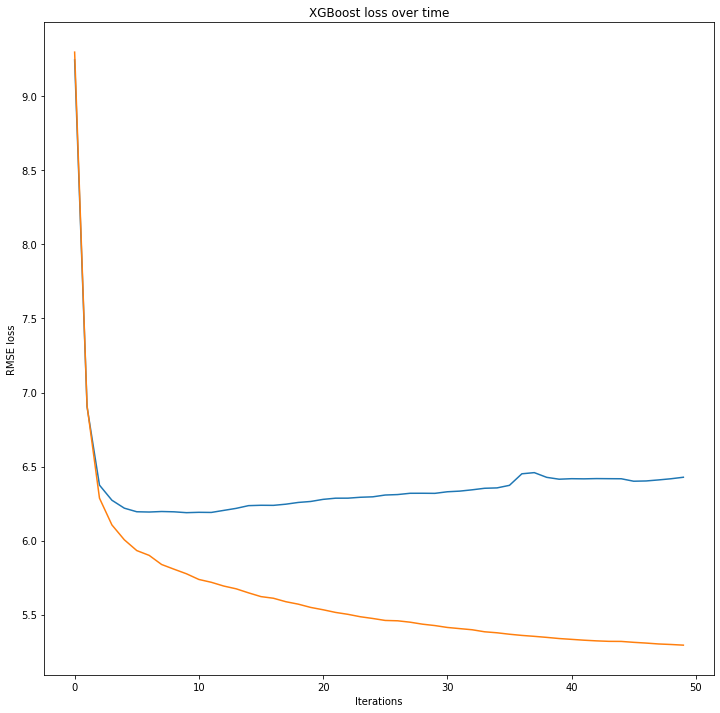

In [7]:
# Plot loss
plt.rcParams["figure.figsize"] = (12, 12)
eval_loss, train_loss = result['eval']['rmse'], result['train']['rmse']
it = list(range(len(eval_loss)))
plt.plot(it, eval_loss)
plt.plot(it, train_loss)
plt.xlabel('Iterations')
plt.ylabel('RMSE loss')
plt.title('XGBoost loss over time')
plt.savefig('XGBoost_loss.png')
plt.show()


mean_absolute_error:  9.837972


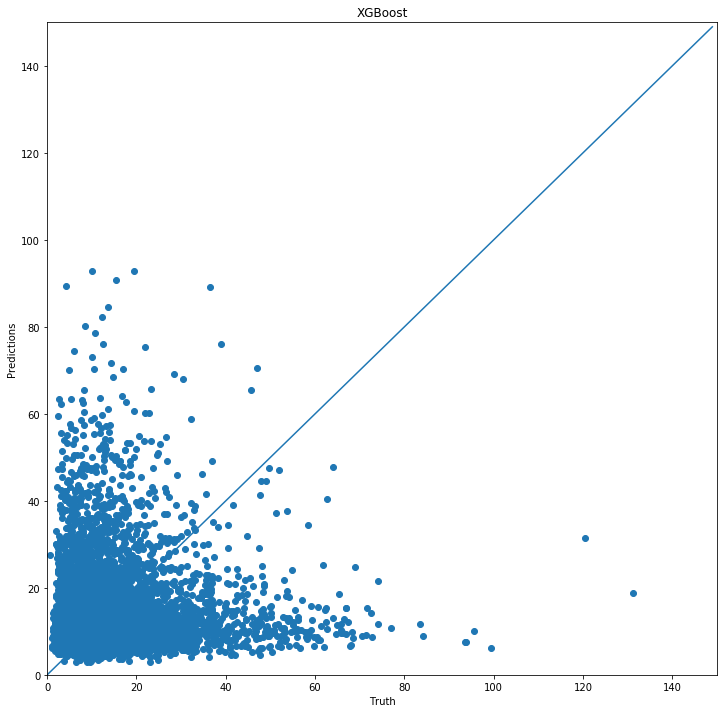

In [8]:
# Test
def Test():
    ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
    ytruth = eval_label
    print(mean_absolute_error, mean_absolute_error(ytruth, ypred))

plt.figure()
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
ytruth = eval_label
print("mean_absolute_error: ", mean_absolute_error(ytruth, ypred))
plt.scatter(ytruth[:10000], ypred[:10000])
plt.xlabel('Truth')
plt.ylabel('Predictions')
r = list(range(150))
plt.plot(r)
plt.xlim((0,150))
plt.ylim((0,150))
plt.title('XGBoost')
plt.savefig('XGBoost_deep_tree.png')


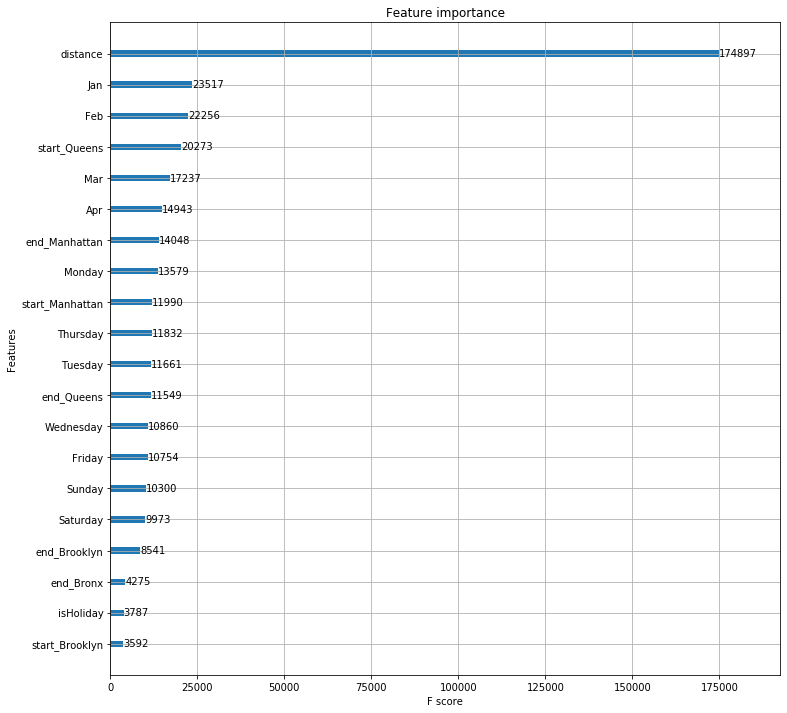

In [33]:
# Plotting
plt.rcParams["figure.figsize"] = (12, 12)
ax = xgb.plot_importance(bst, max_num_features=20)
# xgb.plot_tree(bst, num_trees=2)

In [35]:
fig = ax.figure
fig.savefig("XGBoostFeatureRanking.png")